In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Neural Networks as Universal Approximators

In the theory session, we learned that the neural networks are universal approximators. In this lab, we are going to verify with a few simple univariate function examples that this is indeed true.

To make it easier to play around with the concept, use the ``UnivariateApproximator`` class in the ``svlearn.approximator`` module.

In [12]:
import numpy as np
import torch
from typing import Callable, List
from svlearn.approximator.univariate_approximator import (UnivariateApproximator, 
                                                          UnivariatePrediction)

In [13]:
torch.cuda.is_available()


True

In [14]:
# Ignore this for now, till we learn about dashboards.
#import wandb
#wandb.login()

## A sigmoid-like function



In [15]:
 sigmoid_like = lambda x: 1/(1.0 + np.exp(10-15*x)) 
    
approximator = UnivariateApproximator(sigmoid_like)
approximator.train(1)
approximator.evaluate_model()
correlation = approximator.correlation()
print(f'The Pearson correlation between ground truth and prediction is {correlation}')

[1,  1000] loss: 0.01449
[1,  2000] loss: 0.00091
[1,  3000] loss: 0.00067
[1,  4000] loss: 0.00115
[1,  5000] loss: 0.00079
[1,  6000] loss: 0.00043
[1,  7000] loss: 0.00023
[1,  8000] loss: 0.00131
[1,  9000] loss: 0.00027
[1, 10000] loss: 0.00021
[1, 11000] loss: 0.00032
[1, 12000] loss: 0.00011
[1, 13000] loss: 0.00068
[1, 14000] loss: 0.00011
[1, 15000] loss: 0.00044
[1, 16000] loss: 0.00008
[1, 17000] loss: 0.00007
[1, 18000] loss: 0.00069
[1, 19000] loss: 0.00008
[1, 20000] loss: 0.00043
Finished training
The Pearson correlation between ground truth and prediction is 0.9996942867340852


### Plot the original function and its neural approximation

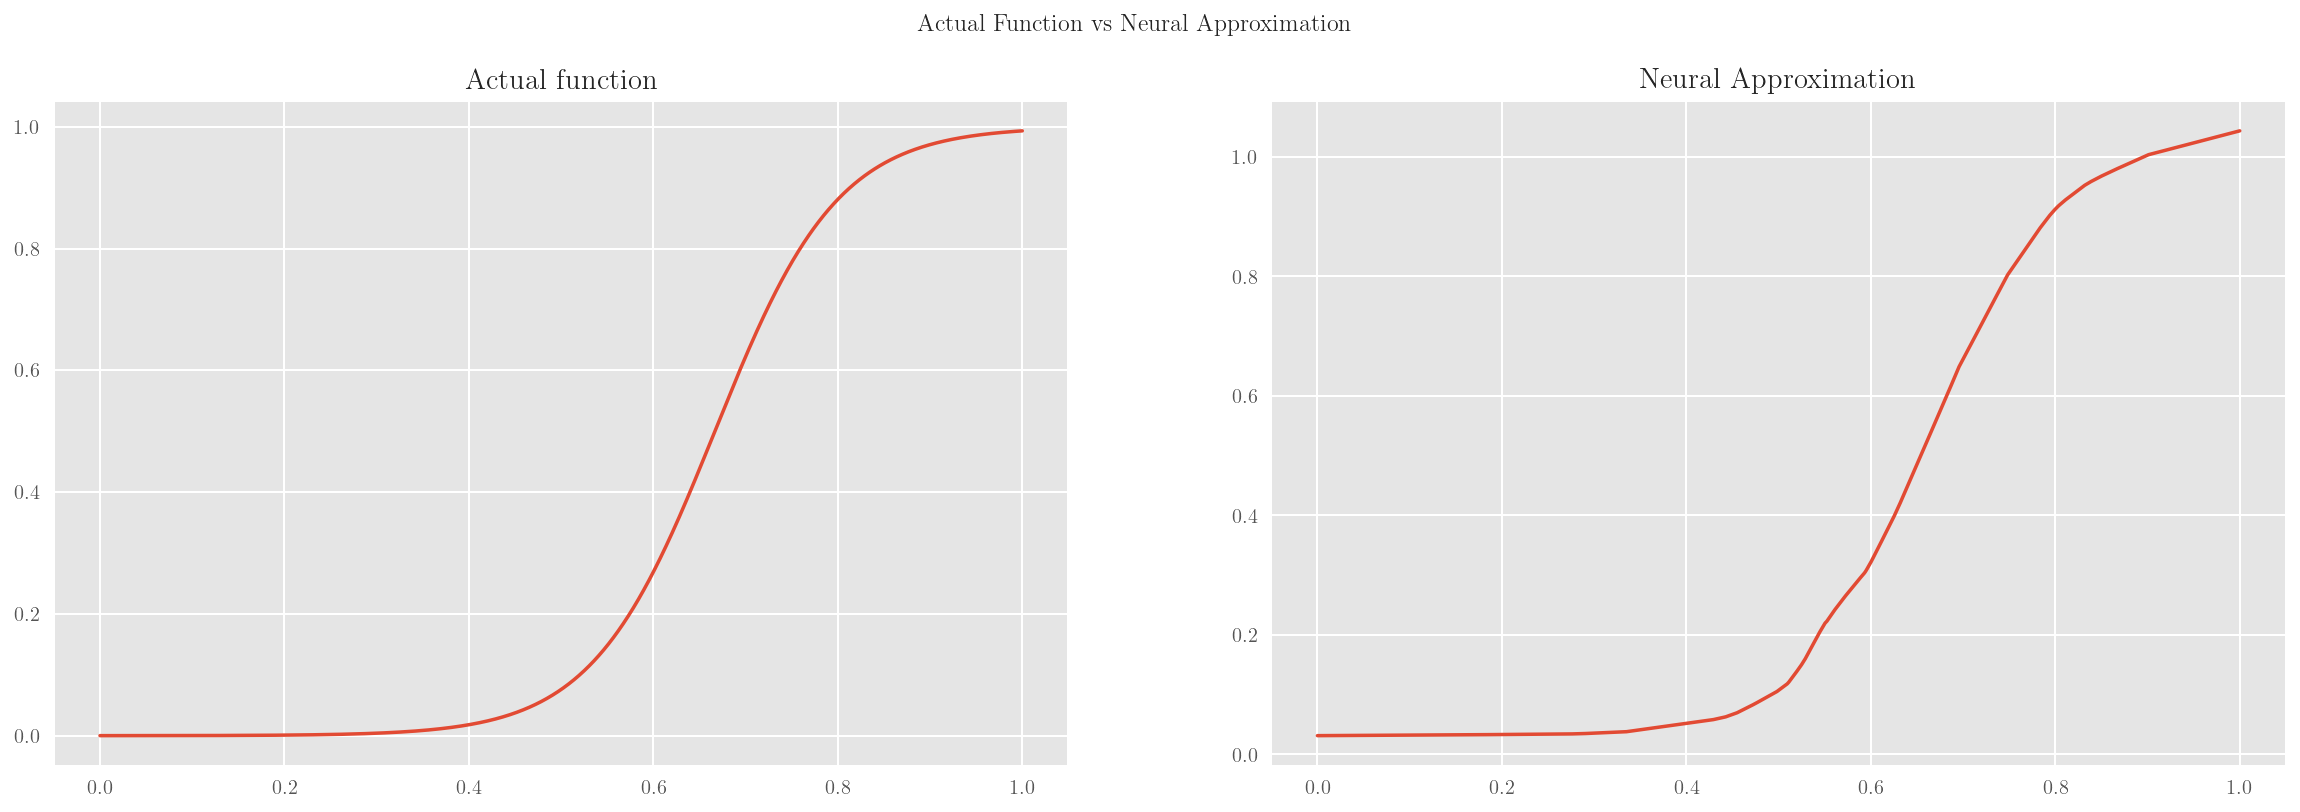

In [16]:
fig = approximator.create_plots()

# A Wierd function

Let us now consider something more complex:

\begin{equation}\label{eq:wierd}
    y = (7 - 5 x + x^2 - 1.5 x^3)\sin(10 x^2) 
\end{equation}

    

In [17]:
# Create the complex function
wierd_x = lambda x:  (7 - 5 * x + x * x - 1.5 * x ** 3)* np.sin(10*x * x)
approximator = UnivariateApproximator(wierd_x)
approximator.train(1)

# Now evaluate the model, and plot it
approximator.evaluate_model()
correlation = approximator.correlation()
print(f'The Pearson correlation between ground truth and prediction is {correlation}')

[1,  1000] loss: 5.68583
[1,  2000] loss: 3.26021
[1,  3000] loss: 1.90243
[1,  4000] loss: 1.86030
[1,  5000] loss: 1.94592
[1,  6000] loss: 1.78374
[1,  7000] loss: 1.88533
[1,  8000] loss: 1.42168
[1,  9000] loss: 0.97819
[1, 10000] loss: 0.77104
[1, 11000] loss: 0.64237
[1, 12000] loss: 0.50631
[1, 13000] loss: 0.41025
[1, 14000] loss: 0.35740
[1, 15000] loss: 0.28551
[1, 16000] loss: 0.30386
[1, 17000] loss: 0.25673
[1, 18000] loss: 0.27070
[1, 19000] loss: 0.24002
[1, 20000] loss: 0.23284
Finished training
The Pearson correlation between ground truth and prediction is 0.9833983408867377


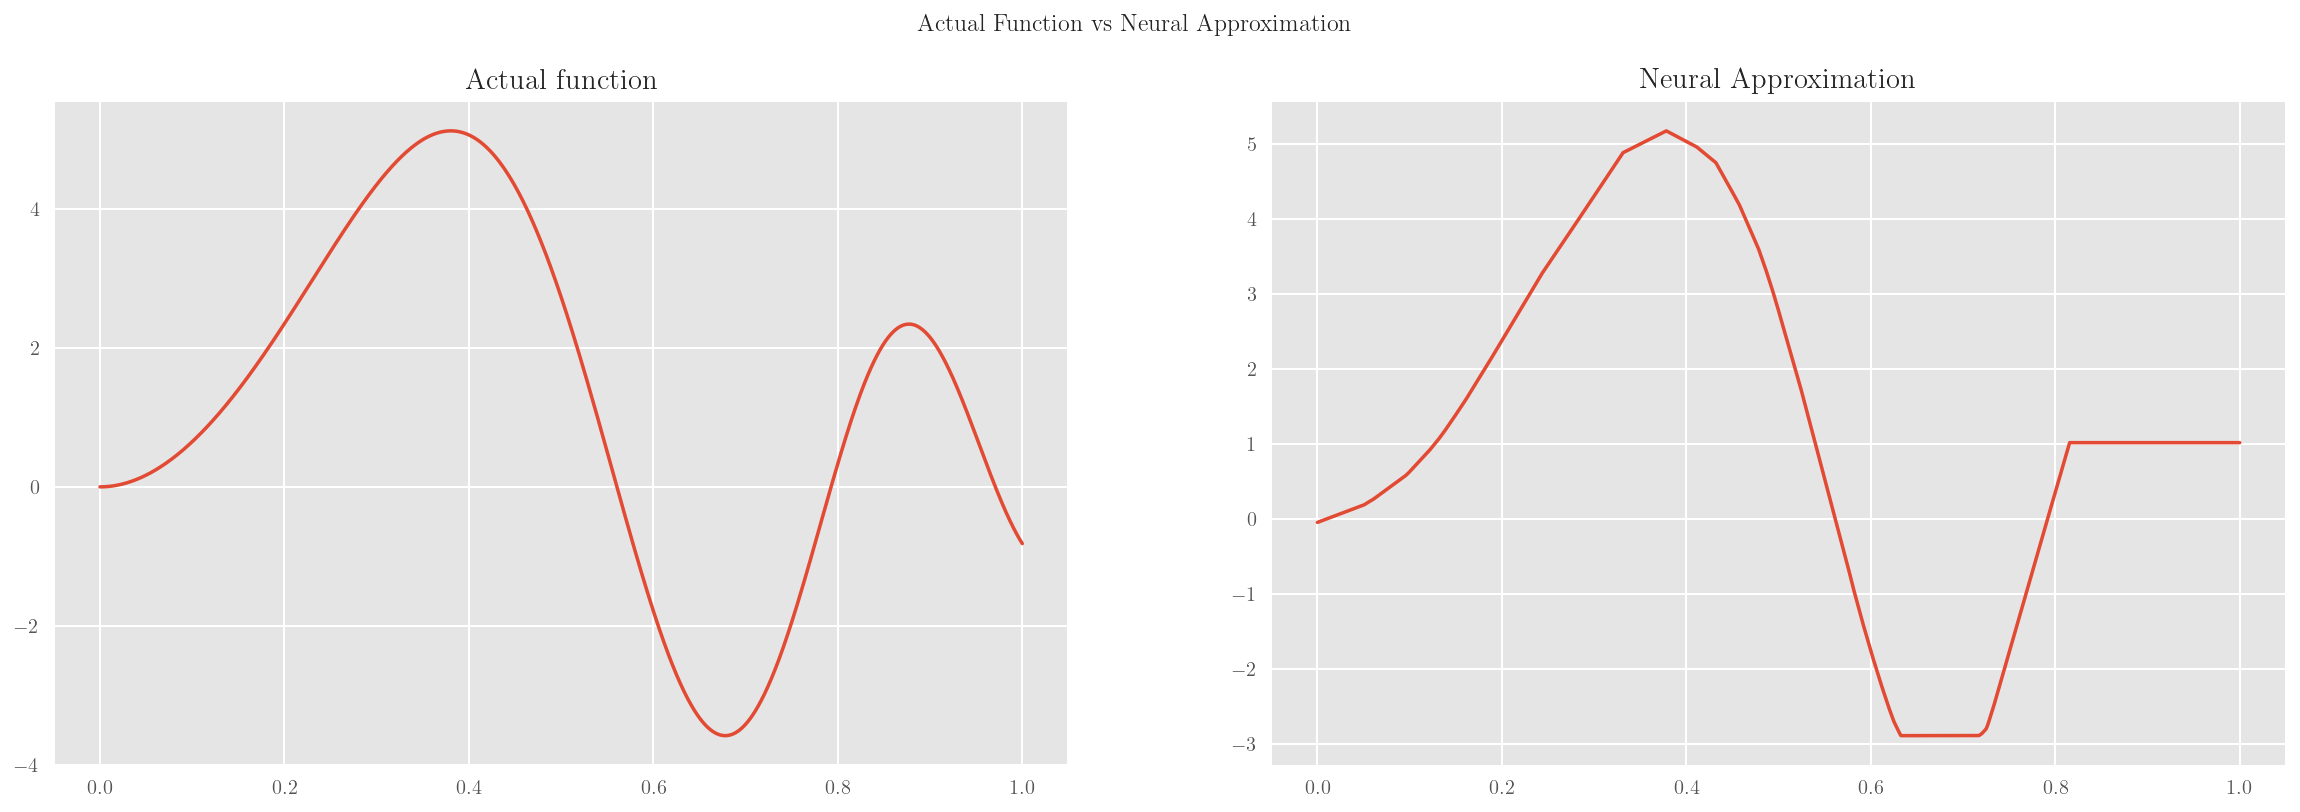

In [18]:
fig = approximator.create_plots()

# Sinc (x)

Consider a function:

\begin{equation}
y = \frac{\sin(3 x)}{x}
\end{equation}

Let us consider this function over the domain of $x \in [0,1]$


In [19]:


# define the function
def xsinx (x: float) -> float:
    return np.sinc(3*x)

approximator = UnivariateApproximator(xsinx)
approximator.train(1)
approximator.evaluate_model()
correlation = approximator.correlation()
print(f'The Pearson correlation between ground truth and prediction is {correlation}')

[1,  1000] loss: 0.01803
[1,  2000] loss: 0.00260
[1,  3000] loss: 0.00063
[1,  4000] loss: 0.00155
[1,  5000] loss: 0.00032
[1,  6000] loss: 0.00117
[1,  7000] loss: 0.00054
[1,  8000] loss: 0.00106
[1,  9000] loss: 0.00031
[1, 10000] loss: 0.00040
[1, 11000] loss: 0.00046
[1, 12000] loss: 0.00043
[1, 13000] loss: 0.00056
[1, 14000] loss: 0.00024
[1, 15000] loss: 0.00043
[1, 16000] loss: 0.00058
[1, 17000] loss: 0.00021
[1, 18000] loss: 0.00028
[1, 19000] loss: 0.00028
[1, 20000] loss: 0.00026
Finished training
The Pearson correlation between ground truth and prediction is 0.9999188671608055


### Plot the original function and its neural approximation

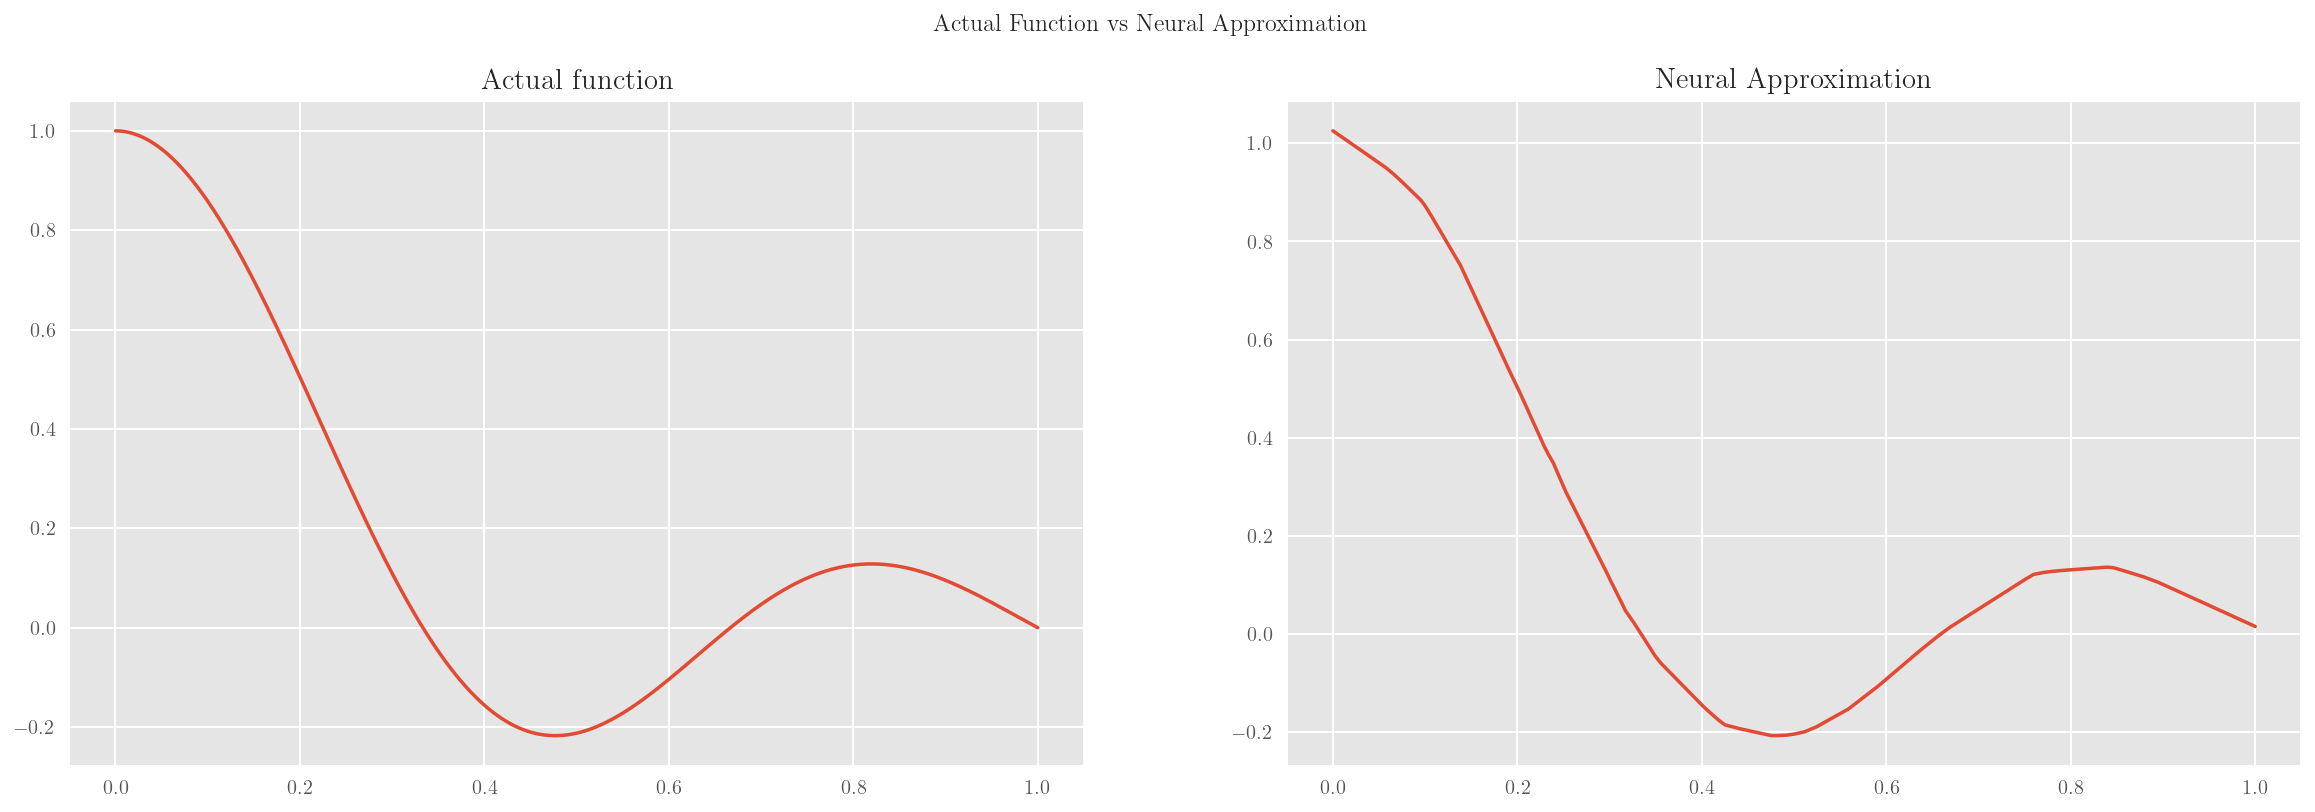

In [20]:
fig = approximator.create_plots()

## An interesting function

\begin{equation}
y = \sin(2 \sin(2 \sin(2 \sin(10 x))))
\end{equation}


In [21]:
# define the function
def to_many_sines (x: float) -> float:
    return np.sin (2*np.sin(2*np.sin(2*np.sin(10*x))))

approximator = UnivariateApproximator(to_many_sines)
approximator.train(1)
approximator.evaluate_model()
correlation = approximator.correlation()
print(f'The Pearson correlation between ground truth and prediction is {correlation}')

[1,  1000] loss: 0.61255
[1,  2000] loss: 0.26345
[1,  3000] loss: 0.17890
[1,  4000] loss: 0.13855
[1,  5000] loss: 0.11034
[1,  6000] loss: 0.08732
[1,  7000] loss: 0.09928
[1,  8000] loss: 0.07308
[1,  9000] loss: 0.06158
[1, 10000] loss: 0.06451
[1, 11000] loss: 0.06968
[1, 12000] loss: 0.05909
[1, 13000] loss: 0.05078
[1, 14000] loss: 0.04530
[1, 15000] loss: 0.05074
[1, 16000] loss: 0.04713
[1, 17000] loss: 0.04819
[1, 18000] loss: 0.03870
[1, 19000] loss: 0.03679
[1, 20000] loss: 0.04359
Finished training
The Pearson correlation between ground truth and prediction is 0.9948142953610861


### Plot the original function and its neural approximation

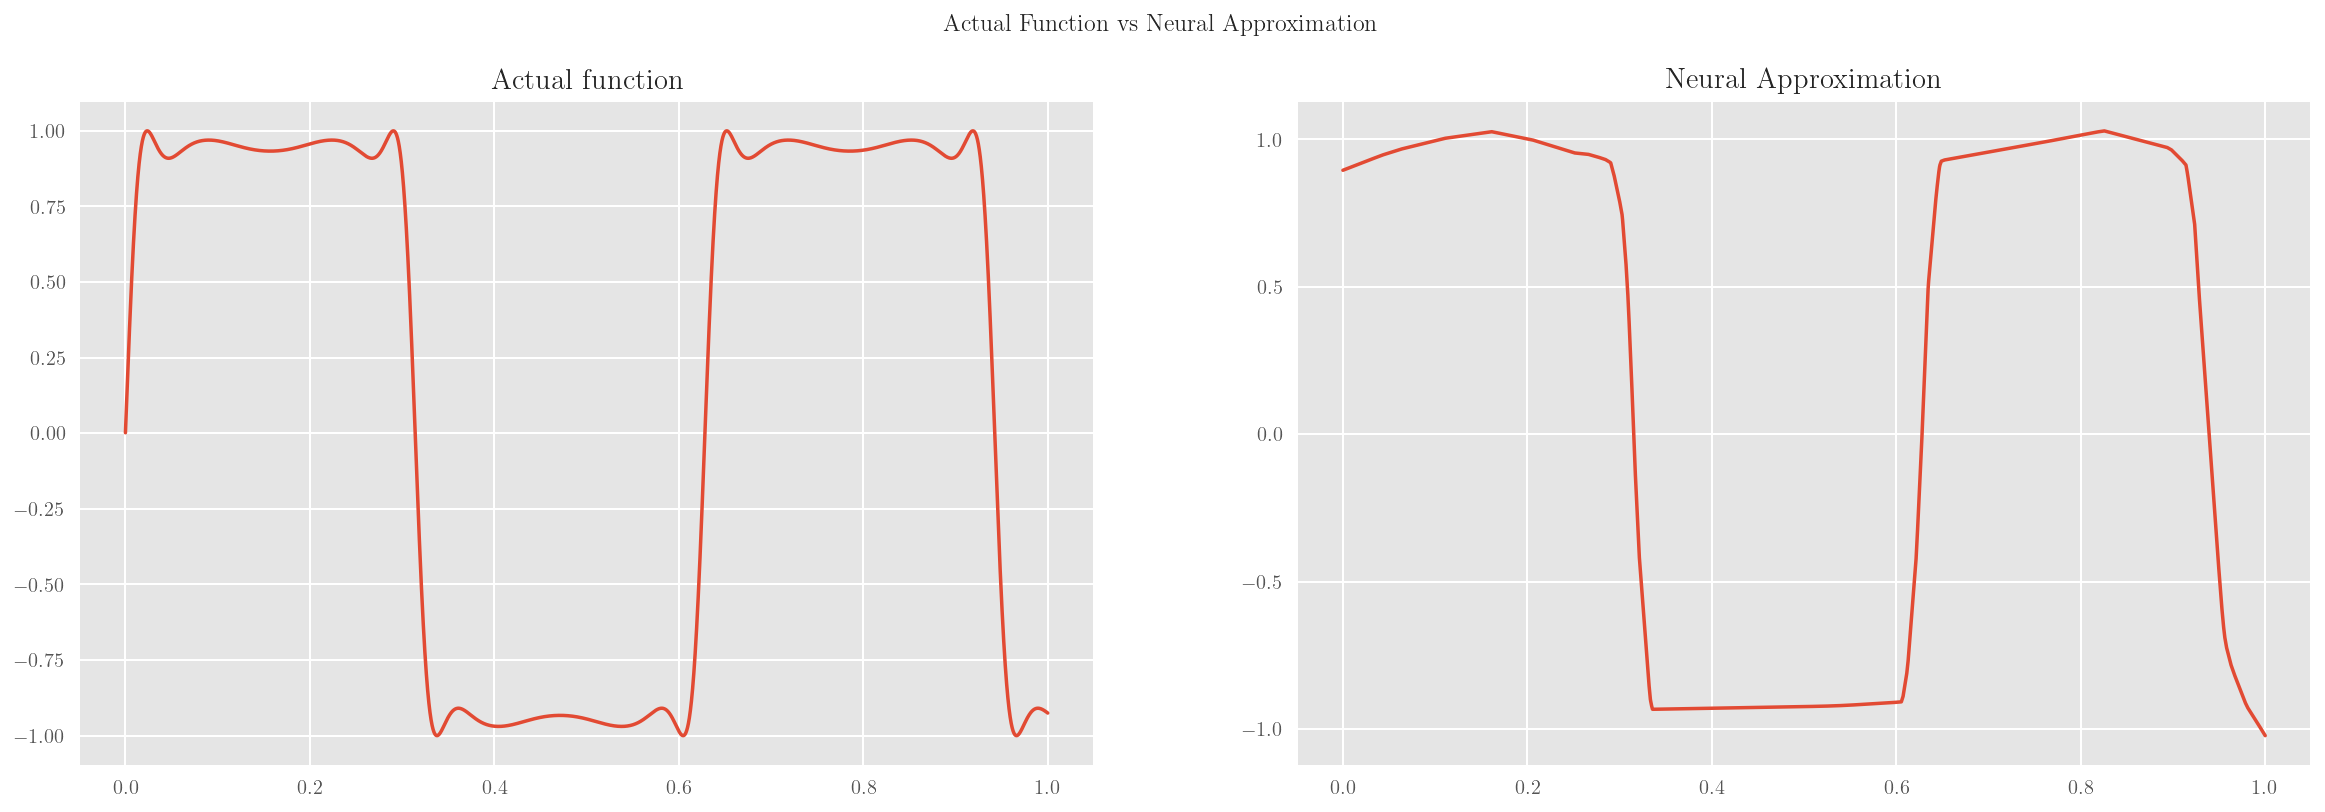

In [22]:
fig = approximator.create_plots()

## Homework

### Code walkthrough

Carefully walk through the code in the `svlearn.approximator.univariate_approximator` python module. In particular, look at the function `create_network()` to see how a regression network has been created. Can you explain why the input and output layers have only one node?

Now, review the main training loop in the function: `train()`. See how the main loop interates over the many epochs (each epoch is one complete cycle through the data, while learning). Furthermore, note how there is an inner loop of learning, which works only with a mini-batch from the data-loader.

### Different activation  functions

Which activation function is the `UnivariateApproximator` using? Replace it with some other activation functions, and see how it affects the speed of training, as well as the final model quality (loss).

### Different learning rates

What is the learning rate in the `UnivariateApproximator`? What would happen if you increase or decrease the learning rate by a few orders of magnitude? Try it out, and discuss the results in our course slack channel.

### Structure of the neural network

What would happen if you either increase or decrease the number of layers in the neural network? In particular, what would happen if you consider a network with only one hidden layer? Try and find out. Can you get good results with only one layer? If so, what do you observe about the number of nodes you built that layer from?
